In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [7]:
import simpy

In [170]:
def log_simulation(m):
    with open("./data.tsv","a") as f:
        f.write(m+"\n")


class Person(object):
    def __init__(self, name, env):
        self.name = name
        self.env = env

    def is_need_to_go(self):
        if np.random.rand() <= 1/(60*8*3) :
                #log_simulation("%s\t%2d\tコーヒー飲みたい！" % (self.name, self.env.now))
                return True
        else:
                #log_simulation("%s\t%2d\t仕事しよ。。" % (self.name, self.env.now))
                return False

    def run(self):
        while True:
            if self.is_need_to_go():
                with coffee_garden.request() as req:
                    yield req
                    yield self.env.timeout(2)
                    #log_simulation("%s\t%2d\tコーヒー美味しい😊" % (self.name, self.env.now))
            yield self.env.timeout(1)

def monitor(resource, env):
    while True:
        log_simulation("淹れてもらってる\t%2d\t%2d" % (resource._env.now, resource.count))
        log_simulation("後ろに並んでる\t%2d\t%2d" % (resource._env.now, len(resource.queue)))
        yield env.timeout(1)

In [171]:
SIM_SIZE = 60*8 #8 * 60
env = simpy.Environment()

coffee_garden = simpy.Resource(env, 2)

for name in ["person_%03d" % i for i in np.arange(0,300,1)]:
    env.process(Person(name, env).run())

env.process(monitor(coffee_garden, env))


with open("./data.tsv","w") as f:
    f.write("\n")
        
env.run(until=SIM_SIZE)

In [172]:
dat = pd.read_csv("./data.tsv",delimiter="\t", header=None)

In [173]:
dat.columns=["name","time","state"]
dat.head()

,name,time,state
0,淹れてもらってる,0,0
1,後ろに並んでる,0,0
2,淹れてもらってる,1,0
3,後ろに並んでる,1,0
4,淹れてもらってる,2,0


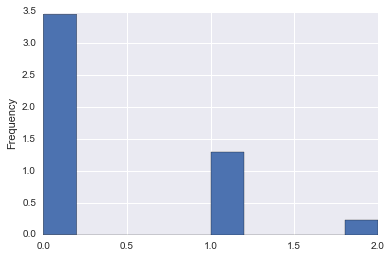

In [174]:
dat.query("name=='淹れてもらってる' ").state.plot.hist(normed=True)

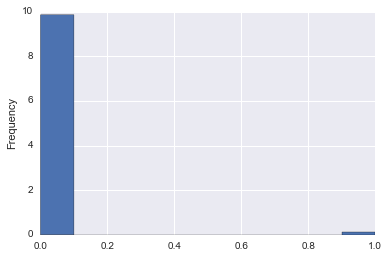

In [175]:
dat.query("name=='後ろに並んでる' ").state.plot.hist(normed=True)